# Hospital emergency simulation

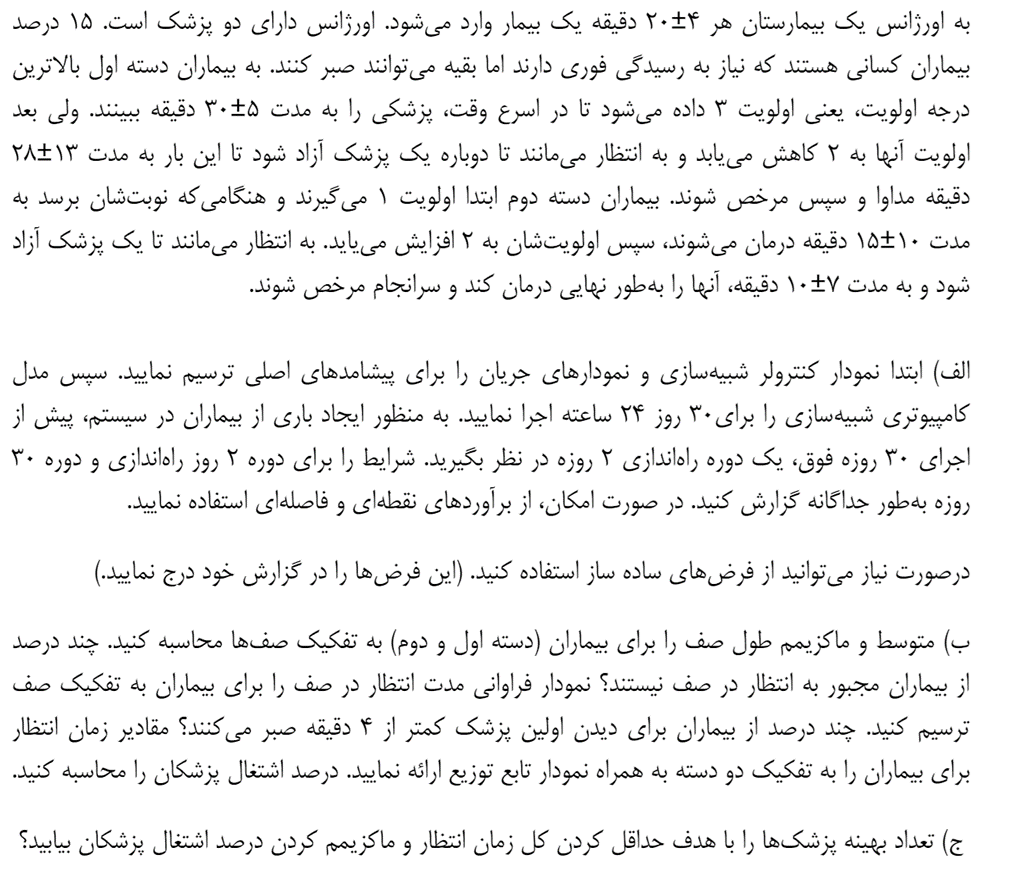

In [8]:
from IPython.display import Image, display
display(Image(filename="C:/Users/USER/Desktop/im.png"))

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
from random import randint
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

خروجی در روز 2 ام
 درصد بیمارانی که کمتر از 4 دقیقه منتظر پزشک اول می مانند: 58.33 %
 درصد بیمارانی که در صف نمی ایستند : 30.56 %
  تعداد بیماران ورودی به سیستم :144
 درصد اشتغال پزشک اول : 77.23 %
 درصد اشتغال پزشک دوم : 63.05 %
 ماکسیمم تعداد بیماران فوری در صف پزشک اول :1
 ماکسیمم تعداد بیماران غیرفوری در صف پزشک اول :3
 ماکسیمم تعداد بیماران فوری در صف پزشک دوم :5
متوسط زمان انتظار بیماران فوری در صف پزشک اول: 0.53 دقیقه
متوسط زمان انتظار بیماران غیرفوری در صف پزشک اول: 6.94 دقیقه
متوسط زمان انتظار بیماران در صف پزشک دوم: 10.51 دقیقه
متوسط طول صف بیماران فوری در صف پزشک اول: 0.03
متوسط طول صف بیماران غیرفوری در صف پزشک اول: 0.35
متوسط طول صف بیماران در صف پزشک دوم: 0.52
  تعداد بیماران معاینه شده پزشک اول  :143
  تعداد بیماران معاینه شده پزشک دوم  :143
  متوسط زمان خدمت دهی پزشک اول  :15.77
  متوسط زمان خدمت دهی پزشک دوم  :12.74
زمان پایان در شبیه سازی: 2887.10
 تعداد بیماران فوری که در صف پزشک اول منتظر می مانند: 12
 تعداد بیماران غیرفوری که در صف پزشک اول منتظر می مانند: 63
 تعدا

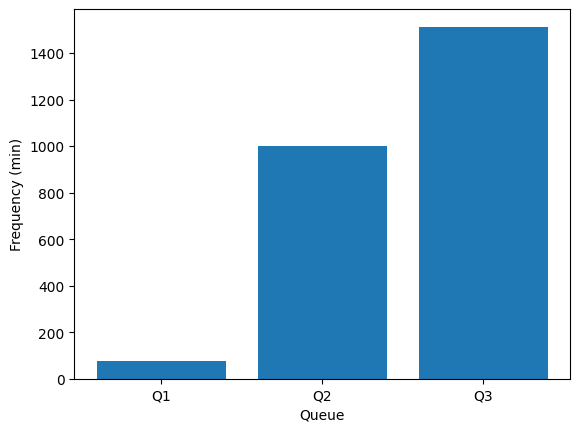

                                     
خروجی نهایی در روز 32 ام
 درصد بیمارانی که کمتر از 4 دقیقه منتظر پزشک اول می مانند: 45.05 %
 درصد بیمارانی که در صف نمی ایستند : 22.89 %
  تعداد بیماران ورودی به سیستم :2302
 درصد اشتغال پزشک اول : 84.44 %
 درصد اشتغال پزشک دوم : 63.87 %
 ماکسیمم تعداد بیماران فوری در صف پزشک اول :2
 ماکسیمم تعداد بیماران غیرفوری در صف پزشک اول :7
 ماکسیمم تعداد بیماران فوری در صف پزشک دوم :6
متوسط زمان انتظار بیماران فوری در صف پزشک اول: 1.28 دقیقه
متوسط زمان انتظار بیماران غیرفوری در صف پزشک اول: 15.15 دقیقه
متوسط زمان انتظار بیماران در صف پزشک دوم: 8.58 دقیقه
متوسط طول صف بیماران فوری در صف پزشک اول: 0.06
متوسط طول صف بیماران غیرفوری در صف پزشک اول: 0.76
متوسط طول صف بیماران در صف پزشک دوم: 0.43
  تعداد بیماران معاینه شده پزشک اول  :2302
  تعداد بیماران معاینه شده پزشک دوم  :2301
  متوسط زمان خدمت دهی پزشک اول  :16.91
  متوسط زمان خدمت دهی پزشک دوم  :12.79
زمان پایان در شبیه سازی: 46084.55
 تعداد بیماران فوری که در صف پزشک اول منتظر می مانند: 262
 تعداد بیماران 

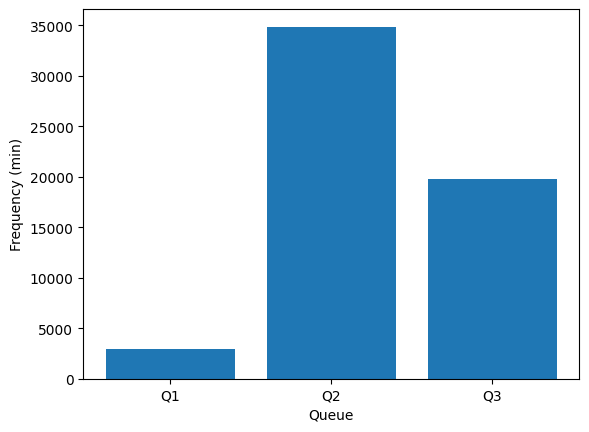

C:\Users\USER\AppData\Local\Temp\ipykernel_19244\3213322337.py:262: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tbl=tbl.append(a,ignore_index=True)


In [20]:
class Srv_Simulation:
    def __init__(self):
        self.fel=[[0,0]] # فرض ساده ساز ورود در زمان صفر است 
        self.fel_total=[[0,0]] #لیستی که لیست پیشامدها را بدون حذف کردن نگهداری می کند
        self.T = 32*24*60 #زمان کل شبیه سازی
        self.Tnow = 0.0 #ساعت شبیه سازی
        self.list_Tnow=[] #لیستی که زمان های فعلی را هر بار نگهداری می کند
        self.last_event_time=0 # قبلی tnow
        self.Mtot = 0 #تعداد کل مشتریان
        self.SVR1 = 0 # زمان خدمت دهی دستگاه اول 
        self.SVR2 = 0 # زمان خدمت دهی دستگاه دوم 
        self.list_SVR1=[] # زمان های تجمعی خدمتدهی را در لیستی نگهداری می کند 
        self.list_SVR2=[]
        self.s1 = 0 #0 or 1 # وضعیت فعلی سرویس دستگاه اول  
        self.s2 = 0 #0 or 1 # وضعیت فعلی سرویس دستگاه دوم          
        self.type_event=0 #تایپ پیشامد
        self.maxQ1=0#بیشترین میزان صف
        self.maxQ2=0 
        self.maxQ3=0
        self.list_wait=[]
        self.Q1_list=[]
        self.Q2_list=[]
        self.Q3_list=[]
        self.s2_list=[]
        self.list_code=[]  #لیست کدهای اجرایی را ذخیره می کند
        self.N1 = 0 #تعداد افرادی که از پزشک اول خدمت دریافت کردند  
        self.N2 = 0 #تعداد افرادی که از پزشک دوم خدمت دریافت کردند  
        self.Q1=0 #تعداد بیماران فوری منتظر در صف پزشک اول
        self.Q2=0 #تعداد بیماران غیرفوری منتظر در صف پزشک اول
        self.Q3=[] # بیماران منتظر در صف پشت دستگاه دوم
        self.NQ1 = 0 #تعداد افرادی که در صف منتظر ماندند
        self.NQ2 = 0 #تعداد افرادی که در صف منتظر ماندند
        self.NQ3 = 0 #تعداد افرادی که در صف منتظر ماندند
        self.Twt1 = 0.0  #  ذخیره زمان انتظار پزشک اول بیماران فوری
        self.Twt2 = 0.0  #   ذخیره زمان انتظار پزشک اول بیماران غیرفوری
        self.Twt3 = 0.0  #  ذخیره زمان انتظار پزشک دوم
        self.wait_s1 = []
        self.wait_total = []
        self.i= 0

    def next_event(self):
        self.fel.sort(key=lambda x: x[1]) #سورت کردن لیست پیشامدها
        self.type_event=self.fel[0][0] #ذخیره نوع پیشامد
        self.list_code.append(self.type_event) 
        self.Tnow=self.fel[0][1]#جلو بردن ساعت شبیه سازی
        self.list_Tnow.append(self.Tnow)

        del self.fel[0] # بیرون کشیدن پیشامد اجرا شده از لیست پیشامد
        if self.type_event==0:# ورود:0
            self.arrival()
        elif self.type_event==11 or self.type_event==21:#پیشامد اتمام خدمتدهی پزشک اول
            self.Server1()
        elif self.type_event==12 or self.type_event==22:#پیشامد اتمام خدمتدهی پزشک دوم
            self.Server2()
            
    def arrival(self):
        self.Mtot += 1
        self.at= self.generate_time_interarrival()#برنامه ریزی برای ورود بعدی
        self.fel.append([0, self.Tnow + self.at])
        self.fel_total.append([0, self.Tnow + self.at])
        self.i+=1 
        if np.random.uniform(low=0,high=1) > 0.85:
            if self.s1 == 0: 
                self.s1 = 1   
                self.s2_list.append([self.i, self.Tnow , self.Tnow ,1000000000 , 1000000000, 1]) 
                self.ST1 = self.generate_service_time_11()  # مدت زمان خدمت دهی برای بیمار فوری توسط پزشک اول  
                self.SVR1 += self.ST1 
                self.list_SVR1.append(self.SVR1)
                self.fel.append([11, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([11, self.Tnow + self.ST1]) 
            else :
                self.Q1_list.append([self.i, self.Tnow, 1000000000 ,1000000000,1000000000, 1])
                self.update_wait_times()
                self.Q1 += 1
                self.NQ1 +=1
                if self.Q1>self.maxQ1:
                    self.maxQ1=self.Q1
        else:
            if self.s1 == 0:
                self.s1 = 1 
                self.s2_list.append([self.i, self.Tnow , self.Tnow ,1000000000,1000000000, 2])
                self.ST1 = self.generate_service_time_21()  #Able مدت زمان خدمت دهی برای سرور 
                self.SVR1 += self.ST1
                self.list_SVR1.append(self.SVR1)
                self.fel.append([21, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([21, self.Tnow + self.ST1])
            else :
                self.Q2_list.append([self.i, self.Tnow , 1000000000 ,1000000000,1000000000, 2])
                self.update_wait_times()
                self.Q2 += 1
                self.NQ2+=1
                if self.Q2>self.maxQ2:
                    self.maxQ2=self.Q2
        
    def Server1(self): #اتمام خدمت دهی دستگاه اول 
        self.N1 += 1 #از پزشک اول سرویس گرفتند
        if self.Q1!=0 : #بیمار فوری صف داشته باشه
            self.ST1 = self.generate_service_time_11()#تولید زمان خدمت دهی
            self.SVR1 += self.ST1 #افزایش زمان خدمتدهی تجمعی
            self.list_SVR1.append(self.SVR1)
            self.fel.append([11, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
            self.fel_total.append([11, self.Tnow + self.ST1])
            self.update_wait_times()
            self.Q1 -= 1 #یک نفر از صف کم می شود
            
            self.Q1_list[0][2]=self.Tnow
            patient =self.Q1_list.pop(0)
            self.s2_list.append(patient)
            
            
        else :#صف بیمار فوری خالی باشه  
            if self.Q2!=0 : # بیمار غیر فوری صف داشته باشه 
                self.ST1 = self.generate_service_time_21()#تولید زمان خدمت دهی
                self.SVR1 += self.ST1 #افزایش زمان خدمتدهی تجمعی
                self.list_SVR1.append(self.SVR1)
            
                self.fel.append([21, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([21, self.Tnow + self.ST1])
                self.update_wait_times()            
                self.Q2 -= 1 #یک نفر از صف کم می شود
                self.Q2_list[0][2]=self.Tnow
                patient =self.Q2_list.pop(0)
                self.s2_list.append(patient)
                
            else:
                self.s1 = 0#خدمت تمام شده، هیچ صفی وجود ندارد، وضعیت بیکار می شود
        if self.s2==0:
            self.s2_list[0][3]=self.Tnow
            self.s2_list[0][4]=self.Tnow
            patient=self.s2_list.pop(0)
            self.list_wait.append(patient)
            self.s2 =1
            if self.type_event==11:
                self.ST2 = self.generate_service_time_12()  #Able مدت زمان خدمت دهی برای سرور 
                self.fel.append([12, self.Tnow + self.ST2])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([12, self.Tnow + self.ST2])
            if self.type_event==21:
                self.ST2 = self.generate_service_time_22()  #Able مدت زمان خدمت دهی برای سرور 
                self.fel.append([22, self.Tnow + self.ST2])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([22, self.Tnow + self.ST2])
    
            self.SVR2 += self.ST2
            self.list_SVR2.append(self.SVR2)
        else:
            self.s2_list[0][3]=self.Tnow
            patient=self.s2_list.pop(0)
            self.Q3_list.append(patient)
            self.update_wait_times()
            self.Q3.append(self.type_event)
            self.NQ3+=1
            if len(self.Q3)>self.maxQ3:
                self.maxQ3=len(self.Q3)
      
    def Server2(self):#اتمام خدمت دهی دستگاه دوم 
        self.N2 += 1 #از پزشک دوم سرویس گرفتند
        if len(self.Q3)!=0: #صف پشت پزشک دوم وجود دارد
            #self.Q3!=0
            if self.Q3[0]==11:
                self.ST2 = self.generate_service_time_12()#تولید زمان خدمت دهی
                self.fel.append([12, self.Tnow + self.ST2])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([12, self.Tnow + self.ST2])
            else: #self.Q3[0]==21:
                self.ST2 = self.generate_service_time_22()#تولید زمان خدمت دهی
                self.fel.append([22, self.Tnow + self.ST2])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([22, self.Tnow + self.ST2])
            
            self.SVR2 += self.ST2 #افزایش زمان خدمتدهی تجمعی
            self.list_SVR2.append(self.SVR2)
            self.update_wait_times()
            self.Q3.pop(0)#یک نفر از صف کم می شود
            self.Q3_list[0][4]=self.Tnow
            patient=self.Q3_list.pop(0)
            self.list_wait.append(patient)

        else :
            self.s2 = 0   #خدمت تمام شده و صف وجود ندارد، وضعیت بیکار می شود
    
    def update_wait_times(self):
        self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time)
        self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time)
        self.Twt3 += len(self.Q3) * (self.Tnow - self.last_event_time)
        self.last_event_time = self.Tnow
             
    def generate_time_interarrival(self): #اعداد تصادفی نرمال زمان بین دو ورود
        return np.random.normal(loc=20, scale=4)
                
    def generate_service_time_11(self): #بیمار فوری و پزشک اول
        return np.random.normal(loc=30, scale=5)#اعداد تصادفی نرمال برای زمان خدمت دهی
    
    def generate_service_time_12(self): #بیمار فوری و پزشک دوم
        return np.random.normal(loc=28, scale=13)#اعداد تصادفی نرمال برای زمان خدمت دهی
    
    def generate_service_time_21(self): #بیمار غیر فوری و پزشک اول
        return np.random.normal(loc=15, scale=10)#اعداد تصادفی نرمال برای زمان خدمت دهی
    
    def generate_service_time_22(self): #بیمار نوع دوم و پزشک دوم 
        return np.random.normal(loc=10, scale=7)#اعداد تصادفی نرمال برای زمان خدمت دهی

    def report(self):
        for sublist in s.list_wait:  # حلقه برای محاسبه تفاوت و افزودن به لیست جدید
            difference = [sublist[2] - sublist[1],sublist[5]] #sublist[4] - sublist[3]
            s.wait_s1.append(difference)
        count_less_than_four = sum(difference[0] < 4 for difference in s.wait_s1)# تعداد اعداد کمتر از 4
        print(' درصد بیمارانی که کمتر از 4 دقیقه منتظر پزشک اول می مانند: {:.2f}'.format((count_less_than_four/(s.Mtot))*100),'%')

        for sublist in s.list_wait:  # حلقه برای محاسبه تفاوت و افزودن به لیست جدید
            differencee = [sublist[2] - sublist[1] + sublist[4] - sublist[3] ,sublist[5]]
            s.wait_total.append(differencee)      
        count_equal_0 = sum(differencee[0] == 0 for differencee in s.wait_total) 
        print(' درصد بیمارانی که در صف نمی ایستند : {:.2f}'.format((count_equal_0/(s.Mtot))*100),'%')
        print('  تعداد بیماران ورودی به سیستم :{:.0f}'.format(s.Mtot))
        print(' درصد اشتغال پزشک اول : {:.2f}'.format((s.list_SVR1[-2]/(s.Tnow))*100),'%')
        print(' درصد اشتغال پزشک دوم : {:.2f}'.format((s.list_SVR2[-2]/(s.Tnow))*100),'%')
        print(' ماکسیمم تعداد بیماران فوری در صف پزشک اول :{:.0f}'.format(s.maxQ1))
        print(' ماکسیمم تعداد بیماران غیرفوری در صف پزشک اول :{:.0f}'.format(s.maxQ2))
        print(' ماکسیمم تعداد بیماران فوری در صف پزشک دوم :{:.0f}'.format(s.maxQ3))
        print('متوسط زمان انتظار بیماران فوری در صف پزشک اول: {:.2f} دقیقه'.format(s.Twt1 / s.Mtot))
        print('متوسط زمان انتظار بیماران غیرفوری در صف پزشک اول: {:.2f} دقیقه'.format(s.Twt2 / s.Mtot))
        print('متوسط زمان انتظار بیماران در صف پزشک دوم: {:.2f} دقیقه'.format(s.Twt3 / s.Mtot))
        print('متوسط طول صف بیماران فوری در صف پزشک اول: {:.2f}'.format(s.Twt1 / s.Tnow))
        print('متوسط طول صف بیماران غیرفوری در صف پزشک اول: {:.2f}'.format(s.Twt2 / s.Tnow))
        print('متوسط طول صف بیماران در صف پزشک دوم: {:.2f}'.format(s.Twt3 / s.Tnow))
        print('  تعداد بیماران معاینه شده پزشک اول  :{:.0f}'.format(s.N1))
        print('  تعداد بیماران معاینه شده پزشک دوم  :{:.0f}'.format(s.N2))
        print('  متوسط زمان خدمت دهی پزشک اول  :{:.2f}'.format(s.SVR1/s.N1))
        print('  متوسط زمان خدمت دهی پزشک دوم  :{:.2f}'.format(s.SVR2/s.N2))
        print('زمان پایان در شبیه سازی: {:.2f}'.format(s.Tnow))
        print(' تعداد بیماران فوری که در صف پزشک اول منتظر می مانند: {:.0f}'.format(s.NQ1))
        print(' تعداد بیماران غیرفوری که در صف پزشک اول منتظر می مانند: {:.0f}'.format(s.NQ2))
        print(' تعداد افرادی که در صف پزشک دوم منتظر می مانند: {:.0f}'.format(s.NQ3))
        print(' درصد بیمارانی که مجبور ایستادن در صف پزشک اول نیستند: {:.2f}'.format(100*(1-(s.NQ1+s.NQ2)/s.N1)),'%')
        print(' درصد بیمارانی که مجبور ایستادن در صف پزشک دوم نیستند: {:.2f}'.format(100*(1-(s.NQ3)/s.N2)),'%') 
        categories = ['Q1', 'Q2', 'Q3'] # نام های محور ایکس 
        frequencies = [s.Twt1, s.Twt2, s.Twt3]# فراوانی ها برای هر دسته
        plt.bar(categories, frequencies)
        plt.title('')
        plt.xlabel('Queue')
        plt.ylabel('Frequency (min)')
        plt.show() # نمایش نمودار

s = Srv_Simulation()
for i in range(100):
    np.random.seed(i)
    while s.T > s.Tnow:
        s.next_event()
        if s.Tnow >= 2*24*60:  # چک کردن برای اولین نقطه زمانی
            print('خروجی در روز 2 ام')
            s.report()
            print('                                     ')
            break #توقف حلقه
    
    while s.T > s.Tnow:# ادامه شبیه سازی تا رسیدن به نقطه زمانی بعدی
        s.next_event()
        if s.Tnow >= 32*24*60:  # چک کردن برای دومین نقطه زمانی
            print('خروجی نهایی در روز 32 ام')
            s.report()
            break  #توقف حلقه

#برای اینکه لیست پیشامدها به شکل مرتب تری در اکسل باشند:
tbl = pd.DataFrame(columns=['fel'])
a =pd.Series([(s.fel_total)],index=tbl.columns)
tbl=tbl.append(a,ignore_index=True)   
tbl.to_excel('simulation.xlsx')
df = pd.DataFrame({'list fel':(s.fel_total)})
#df.to_excel("sim1.xlsx", index=False)

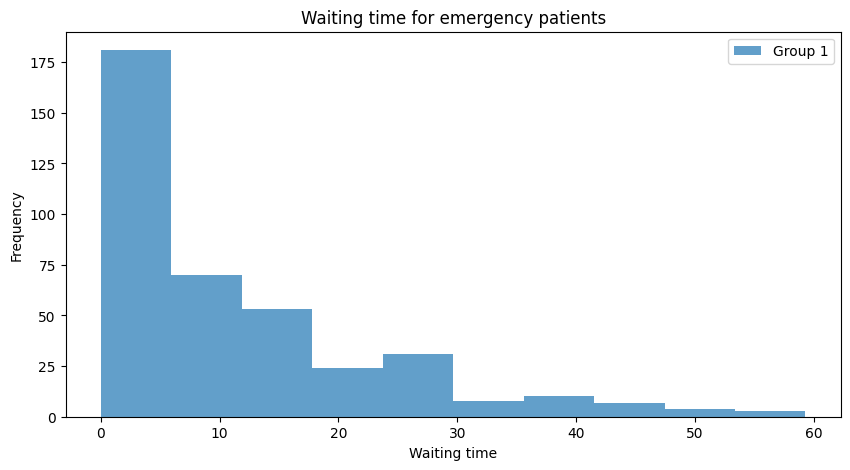

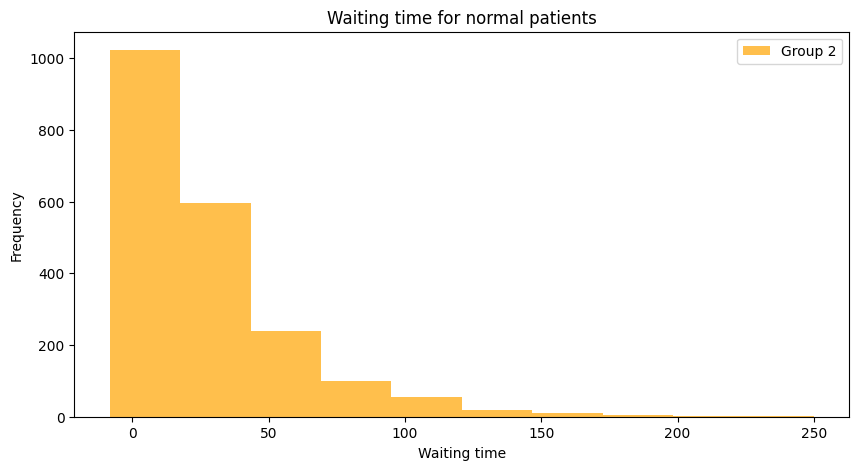

In [25]:
data_1 = [item[0] for item in s.wait_total if item[1] == 1]
data_2 = [item[0] for item in s.wait_total if item[1] == 2]

# رسم نمودار برای دادههای با بخش دوم برابر با 1
plt.figure(figsize=(10, 5))
plt.hist(data_1, bins=10, alpha=0.7, label='Group 1')
plt.xlabel('Waiting time')
plt.ylabel('Frequency')
#plt.title('Distribution of Time Differences for Group 1')
plt.title('Waiting time for emergency patients')
plt.legend()
plt.show()

# رسم نمودار برای دادههای با بخش دوم برابر با 2
plt.figure(figsize=(10, 5))
plt.hist(data_2, bins=10, alpha=0.7, color='orange', label='Group 2')
plt.xlabel('Waiting time')
plt.ylabel('Frequency')
plt.title('Waiting time for normal patients')
plt.legend()
plt.show()

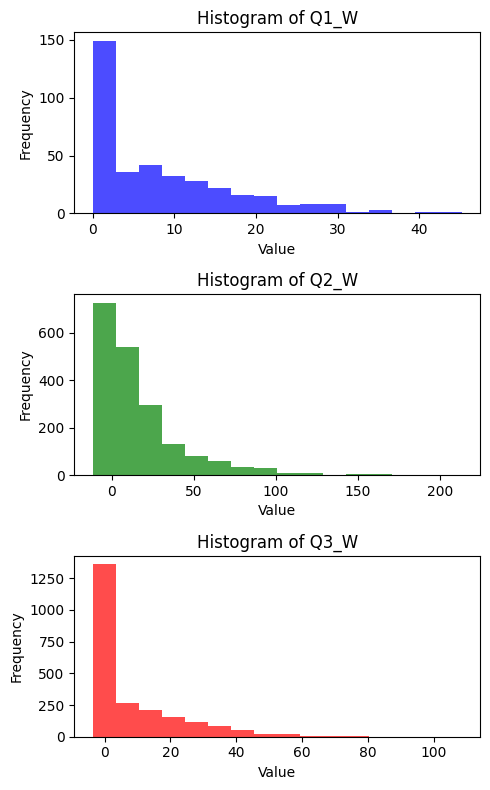

In [26]:
Q1_W = []
Q2_W = []
Q3_W = []

# پیمایش لیست a و پر کردن لیست های مربوطه بر اساس شرایط داده شده
for sublist in s.list_wait:
    Q3_W.append(sublist[4]-sublist[3])
    if sublist[5] == 1:
        Q1_W.append(sublist[2]-sublist[1])
    elif sublist[5] == 2:
        Q2_W.append(sublist[2]-sublist[1])
bins = 16
plt.figure(figsize=(5, 8))

# هیستوگرام Q1_W
plt.subplot(3, 1, 1)
plt.hist(Q1_W, bins=bins, color='blue', alpha=0.7)
plt.title('Histogram of Q1_W')
plt.xlabel('Value')
plt.ylabel('Frequency')

# هیستوگرام Q2_W
plt.subplot(3, 1, 2)
plt.hist(Q2_W, bins=bins, color='green', alpha=0.7)
plt.title('Histogram of Q2_W')
plt.xlabel('Value')
plt.ylabel('Frequency')

# هیستوگرام Q3_W
plt.subplot(3, 1, 3)
plt.hist(Q3_W, bins=bins, color='red', alpha=0.7)
plt.title('Histogram of Q3_W')
plt.xlabel('Value')
plt.ylabel('Frequency')

# تنظیم فضا بین نمودارها
plt.tight_layout()
plt.show()

   server_configs  num_s1  num_s2  SVR1_Percent  SVR2_Percent  average_wt  \
0             1-1       1       1      0.844991      0.638783   25.009366   
1             1-2       1       2      0.854947      0.315557   16.962183   
2             1-3       1       3      0.864958      0.211032   17.185444   
3             1-4       1       4      0.865075      0.158303   17.167947   
4             2-1       2       1      0.425133      0.611216    7.821123   
5             2-2       2       2      0.429037      0.312421    0.372781   
6             2-3       2       3      0.427594      0.208998    0.060879   
7             2-4       2       4      0.426996      0.156716    0.039234   
8             3-1       3       1      0.283522      0.611630    7.745693   
9             3-2       3       2      0.286054      0.312444    0.334888   
10            3-3       3       3      0.285160      0.208760    0.018459   
11            3-4       3       4      0.284762      0.156605    0.000000   

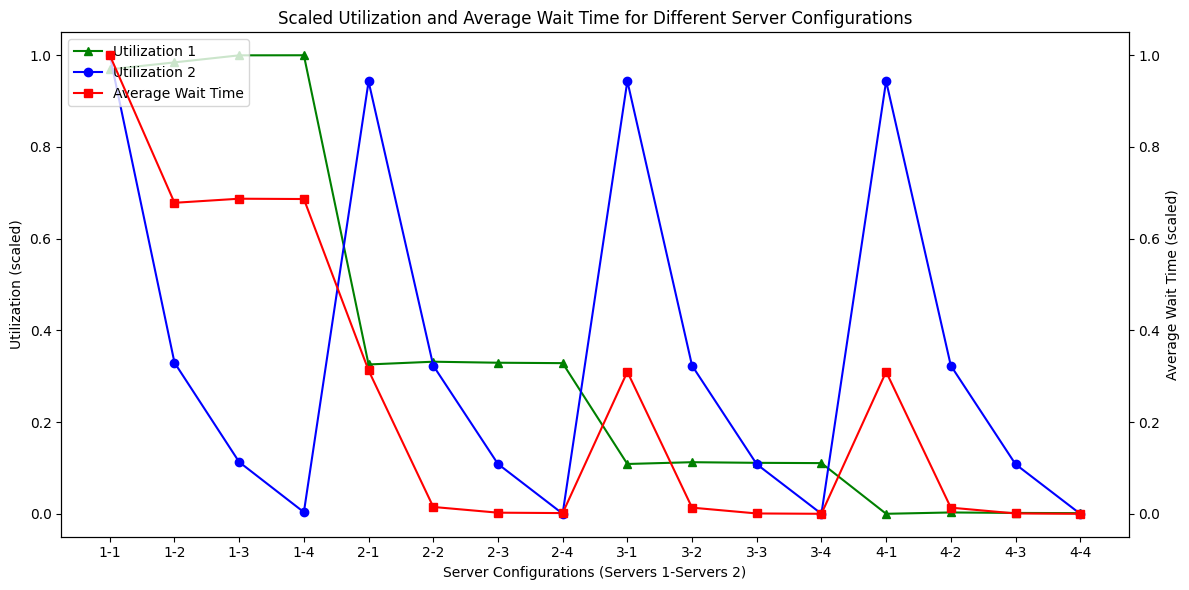

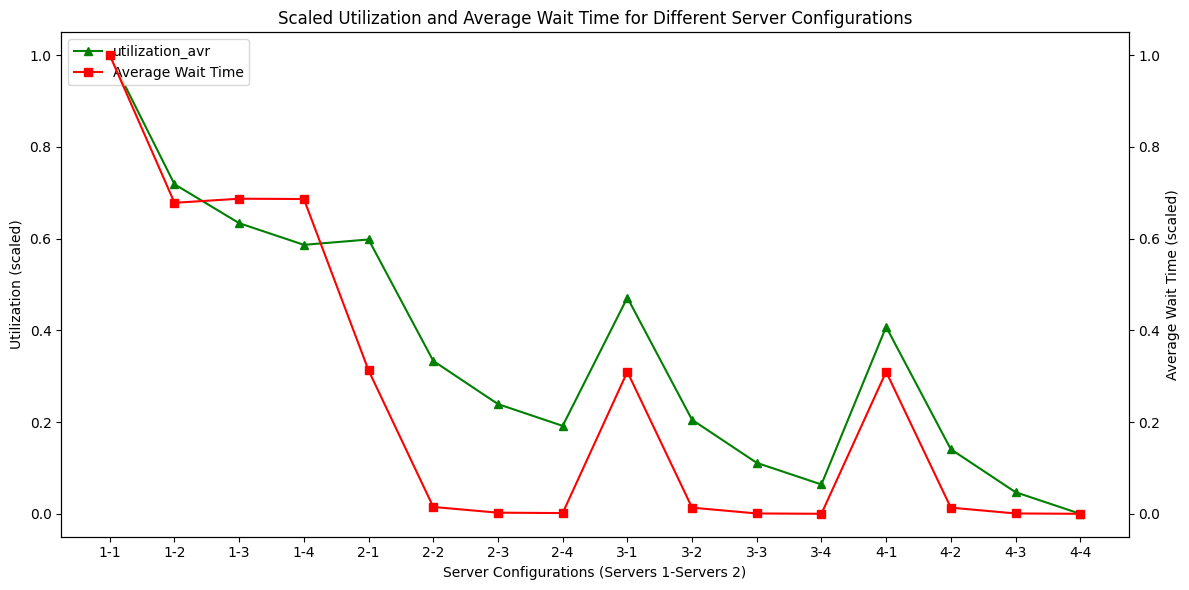

In [15]:
import numpy as np
import pandas as pd

class Srv_Simulation:
    def __init__(self, num_servers_1, num_servers_2):
        self.fel=[[0,0]]  # Event list starting with an initial arrival at time 0
        self.fel_total=[[0,0]]  # Full event list without removing processed events
        self.T = 32*24*60  # Total simulation time in minutes (32 days)
        self.Tnow = 0.0  # Current simulation time
        self.last_event_time = 0  # Time of the last event
        self.Mtot = 0  # Total number of customers

        self.SVR1 = 0  # Total service time for the first set of servers
        self.SVR2 = 0  # Total service time for the second set of servers

        self.s1 = np.zeros((num_servers_1))  # Status of the first set of servers (0=idle, 1=busy)
        self.s2 = np.zeros((num_servers_2))  # Status of the second set of servers (0=idle, 1=busy)

        self.N1 = 0  # Number of patients served by the first set of servers
        self.N2 = 0  # Number of patients served by the second set of servers

        self.Q1 = 0  # Number of urgent patients waiting in the first queue
        self.Q2 = 0  # Number of non-urgent patients waiting in the first queue
        self.Q3 = []  # Patients waiting in the second queue

        self.NQ1 = 0  # Total number of urgent patients that waited in the first queue
        self.NQ2 = 0  # Total number of non-urgent patients that waited in the first queue
        self.NQ3 = 0  # Total number of patients that waited in the second queue

        self.Twt1 = 0.0  # Total waiting time for urgent patients in the first queue
        self.Twt2 = 0.0  # Total waiting time for non-urgent patients in the first queue
        self.Twt3 = 0.0  # Total waiting time in the second queue

    def arrival(self):
        self.Mtot += 1
        self.at = self.generate_time_interarrival()  # Schedule the next arrival
        self.fel.append([0, self.Tnow + self.at])
        self.fel_total.append([0, self.Tnow + self.at])
        
        if np.random.uniform(low=0, high=1) > 0.85:
            for i in range(len(self.s1)):  # Loop through the first set of servers
                if self.s1[i] == 0:
                    self.s1[i] = 1
                    self.ST1 = self.generate_service_time_11()  # Service time for urgent patient
                    self.SVR1 += self.ST1
                    self.fel.append([11, self.Tnow + self.ST1])  # Schedule service completion
                    self.fel_total.append([11, self.Tnow + self.ST1])
                    break
            else:
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time)
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time)
                self.Twt3 += len(self.Q3) * (self.Tnow - self.last_event_time)
                self.last_event_time = self.Tnow
                self.Q1 += 1
                self.NQ1 += 1
        else:
            for i in range(len(self.s1)):  # Loop through the first set of servers
                if self.s1[i] == 0:
                    self.s1[i] = 1
                    self.ST1 = self.generate_service_time_21()  # Service time for non-urgent patient
                    self.SVR1 += self.ST1
                    self.fel.append([21, self.Tnow + self.ST1])  # Schedule service completion
                    self.fel_total.append([21, self.Tnow + self.ST1])
                    break
            else:
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time)
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time)
                self.Twt3 += len(self.Q3) * (self.Tnow - self.last_event_time)
                self.last_event_time = self.Tnow
                self.Q2 += 1
                self.NQ2 += 1

    def Server1(self):
        self.N1 += 1
        if self.Q1 != 0:
            self.ST1 = self.generate_service_time_11()
            self.SVR1 += self.ST1
            self.fel.append([11, self.Tnow + self.ST1])
            self.fel_total.append([11, self.Tnow + self.ST1])
            self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time)
            self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time)
            self.Twt3 += len(self.Q3) * (self.Tnow - self.last_event_time)
            self.last_event_time = self.Tnow
            self.Q1 -= 1
        elif self.Q2 != 0:
            self.ST1 = self.generate_service_time_21()
            self.SVR1 += self.ST1
            self.fel.append([21, self.Tnow + self.ST1])
            self.fel_total.append([21, self.Tnow + self.ST1])
            self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time)
            self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time)
            self.Twt3 += len(self.Q3) * (self.Tnow - self.last_event_time)
            self.last_event_time = self.Tnow
            self.Q2 -= 1
        else:
            for i in range(len(self.s1)):
                if self.s1[i] == 1:
                    self.s1[i] = 0
                    break
        
        for i in range(len(self.s2)):
            if self.s2[i] == 0:
                self.s2[i] = 1
                if self.type_event == 11:
                    self.ST2 = self.generate_service_time_12()
                    self.fel.append([12, self.Tnow + self.ST2])
                    self.fel_total.append([12, self.Tnow + self.ST2])
                elif self.type_event == 21:
                    self.ST2 = self.generate_service_time_22()
                    self.fel.append([22, self.Tnow + self.ST2])
                    self.fel_total.append([22, self.Tnow + self.ST2])
                self.SVR2 += self.ST2
                break
        else:
            self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time)
            self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time)
            self.Twt3 += len(self.Q3) * (self.Tnow - self.last_event_time)
            self.last_event_time = self.Tnow
            self.Q3.append(self.type_event)
            self.NQ3 += 1

    def Server2(self):
        self.N2 += 1
        if len(self.Q3) != 0:
            if self.Q3[0] == 11:
                self.ST2 = self.generate_service_time_12()
                self.fel.append([12, self.Tnow + self.ST2])
                self.fel_total.append([12, self.Tnow + self.ST2])
            else:
                self.ST2 = self.generate_service_time_22()
                self.fel.append([22, self.Tnow + self.ST2])
                self.fel_total.append([22, self.Tnow + self.ST2])
            self.SVR2 += self.ST2
            self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            #self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt3 += len(self.Q3) * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.last_event_time = self.Tnow   
            self.Q3.pop(0)
        else:
            for i in range(len(self.s2)):
                if self.s2[i] == 1:
                    self.s2[i] = 0
                    break

    def generate_time_interarrival(self):
        return np.random.normal(loc=20, scale=4)

    def generate_service_time_11(self):
        return np.random.normal(loc=30, scale=5)

    def generate_service_time_12(self):
        return np.random.normal(loc=28, scale=13)

    def generate_service_time_21(self):
        return np.random.normal(loc=15, scale=10)

    def generate_service_time_22(self):
        return np.random.normal(loc=10, scale=7)

# Simulating with both servers having between 1 to 4 servers
SVR1_Percent = []
SVR2_Percent = []
free_s1 = []
free_s2 = []
average_wt = []
server_configs = []
free_avr = []
utilization_avr=  []
for num_servers_1 in range(1, 5):
    for num_servers_2 in range(1, 5):
        s = Srv_Simulation(num_servers_1, num_servers_2)
        for i in range(1000):
            np.random.seed(i)
            while True:
                s.fel.sort(key=lambda x: x[1])
                s.Tnow = s.fel[0][1]
                if s.Tnow > s.T:
                    break
                s.type_event = s.fel[0][0]
                del s.fel[0]
                if s.type_event == 0:
                    s.arrival()
                elif s.type_event == 11:
                    s.Server1()
                elif s.type_event == 12:
                    s.Server2()
                elif s.type_event == 21:
                    s.Server1()
                elif s.type_event == 22:
                    s.Server2()
        
        utilization_1 = s.SVR1 / (s.T * num_servers_1)
        utilization_2 = s.SVR2 / (s.T * num_servers_2)
        utilization = (utilization_1+utilization_2)/2
        free_1 = 1-utilization_1
        free_2=1-utilization_2
        free = (free_1+free_2)/2
        average_wait_time = (s.Twt1 + s.Twt2 + s.Twt3) / s.Mtot
        SVR1_Percent.append(utilization_1)
        SVR2_Percent.append(utilization_2)
        free_s1.append(free_1)
        free_s2.append(free_2)
        utilization_avr.append(utilization)
        free_avr.append(free)
        average_wt.append(average_wait_time)
        server_configs.append(f"{num_servers_1}-{num_servers_2}")

# Creating a DataFrame to store the results
results = pd.DataFrame({
    'server_configs' : server_configs,
    'num_s1': np.repeat(np.arange(1, 5), 4),
    'num_s2': np.tile(np.arange(1, 5), 4),
    'SVR1_Percent': SVR1_Percent,
    'SVR2_Percent': SVR2_Percent,
    'average_wt': average_wt,
    'free_s1': free_s1,
    'free_s2': free_s2,
    'utilization_avr':utilization_avr,
    'free_avr':free_avr
})
print(results)

# Scaling the utilization and wait time
scaler = MinMaxScaler()
results[['SVR1_Percent', 'SVR2_Percent','utilization_avr' , 'average_wt']] = scaler.fit_transform(
    results[['SVR1_Percent', 'SVR2_Percent', 'utilization_avr', 'average_wt']]
)

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()

ax1.plot(results['server_configs'], results['SVR1_Percent'], 'g-^', label='Utilization 1')
ax1.plot(results['server_configs'], results['SVR2_Percent'], 'b-o', label='Utilization 2')
ax2.plot(results['server_configs'], results['average_wt'], 'r-s', label='Average Wait Time')

ax1.set_xlabel('Server Configurations (Servers 1-Servers 2)')
ax1.set_ylabel('Utilization (scaled)')
ax2.set_ylabel('Average Wait Time (scaled)')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Scaled Utilization and Average Wait Time for Different Server Configurations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
######

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()

ax1.plot(results['server_configs'], results['utilization_avr'], 'g-^', label='utilization_avr')
ax2.plot(results['server_configs'], results['average_wt'], 'r-s', label='Average Wait Time')

ax1.set_xlabel('Server Configurations (Servers 1-Servers 2)')
ax1.set_ylabel('Utilization (scaled)')
ax2.set_ylabel('Average Wait Time (scaled)')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Scaled Utilization and Average Wait Time for Different Server Configurations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

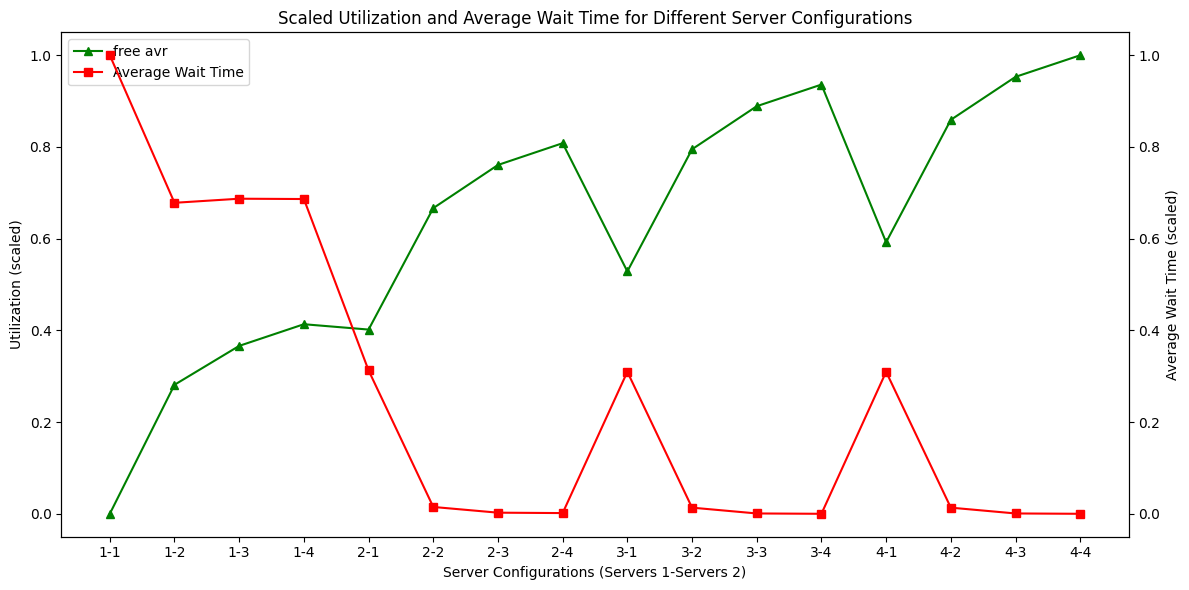

In [16]:
# Scaling the utilization and wait time
scaler = MinMaxScaler()
results[['SVR1_Percent', 'free_s1','free_s2' ,'free_avr','utilization_avr', 'average_wt']] = scaler.fit_transform(
    results[['SVR1_Percent', 'free_s1', 'free_s2', 'free_avr' ,'utilization_avr', 'average_wt']]
)

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()

ax1.plot(results['server_configs'], results['free_avr'], 'g-^', label='free avr')
ax2.plot(results['server_configs'], results['average_wt'], 'r-s', label='Average Wait Time')

ax1.set_xlabel('Server Configurations (Servers 1-Servers 2)')
ax1.set_ylabel('Utilization (scaled)')
ax2.set_ylabel('Average Wait Time (scaled)')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Scaled Utilization and Average Wait Time for Different Server Configurations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

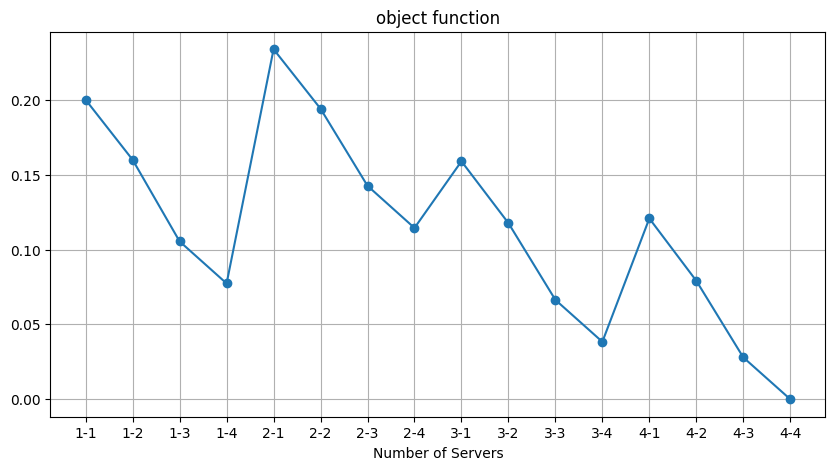

In [17]:
weightSVR=0.6
weightWT=0.4
objective = [+weightSVR * u - weightWT * wt for u, wt in zip(results['utilization_avr'], results['average_wt'])]
#هرچه درصد اشتغال بیشتر بهتر
#هرچه زمان انتظار کمتر بهتر
plt.figure(figsize=(10, 5))
plt.plot(results['server_configs'], objective, marker='o')
plt.title('object function')
plt.xlabel('Number of Servers')
#plt.xticks(np.arange(min(i), max(i)+1,1))
plt.grid(True)
plt.show()